In [1]:
#Importing required Python packages 
import matplotlib.pylab as plt 
import numpy as np 
%matplotlib inline 

import torch
import torch.nn.functional as F

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5
x = x[:, np.newaxis]
y = y[:, np.newaxis]

inp  = np.c_[x,y]

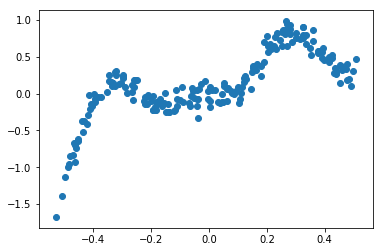

In [3]:
plt.scatter(x, y)

In [4]:
# defining network
X = torch.from_numpy(inp).type(torch.float32)

pieces = 5
We = torch.empty(2,1, requires_grad=True)
be = torch.zeros(1, requires_grad=True)
Wh1 = torch.empty(1,pieces, requires_grad=True)
Wh2 = torch.empty(pieces,1, requires_grad=True)
bh1 = torch.zeros(pieces, requires_grad=True)
bh2 = torch.zeros(1, requires_grad=True)

Wd = torch.empty(1,2, requires_grad=True)
bd = torch.zeros(2, requires_grad=True)

torch.nn.init.xavier_normal_(We)
torch.nn.init.xavier_normal_(Wh1)
torch.nn.init.xavier_normal_(Wh2)
torch.nn.init.xavier_normal_(Wd)

alpha = 0.01
optimizer = torch.optim.Adam(params=[We,Wh1,Wh2,Wd, be, bh1, bh2, bd], lr=alpha)

In [5]:
# act = torch.relu
act = torch.tanh

def encode(x):
    h = x.mm(We) + be #encoded
    h = act(h.mm(Wh1) + bh1) # hidden layer
    return h

def decode(h_):
#     h_ = h_.mm(Wh2) + bh2
    h_ = act(h_.mm(Wh2) + bh2)
    h_ = h_.mm(Wd) + bd
    return h_

def forward(x):
    h = encode(x)
    h_ = decode(h)
    return h_

loss =  tensor(0.9965, grad_fn=<MseLossBackward>)
loss =  tensor(0.1318, grad_fn=<MseLossBackward>)
loss =  tensor(0.1021, grad_fn=<MseLossBackward>)
loss =  tensor(0.0545, grad_fn=<MseLossBackward>)
loss =  tensor(0.0268, grad_fn=<MseLossBackward>)
loss =  tensor(0.0188, grad_fn=<MseLossBackward>)
loss =  tensor(0.0166, grad_fn=<MseLossBackward>)
loss =  tensor(0.0159, grad_fn=<MseLossBackward>)
loss =  tensor(0.0155, grad_fn=<MseLossBackward>)
loss =  tensor(0.0154, grad_fn=<MseLossBackward>)
loss =  tensor(0.0153, grad_fn=<MseLossBackward>)
loss =  tensor(0.0152, grad_fn=<MseLossBackward>)
loss =  tensor(0.0152, grad_fn=<MseLossBackward>)
loss =  tensor(0.0152, grad_fn=<MseLossBackward>)
loss =  tensor(0.0151, grad_fn=<MseLossBackward>)
loss =  tensor(0.0151, grad_fn=<MseLossBackward>)
loss =  tensor(0.0151, grad_fn=<MseLossBackward>)
loss =  tensor(0.0151, grad_fn=<MseLossBackward>)
loss =  tensor(0.0151, grad_fn=<MseLossBackward>)
loss =  tensor(0.0151, grad_fn=<MseLossBackward>)


TclError: invalid command name "pyimage11"

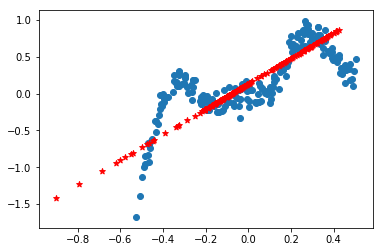

In [6]:
%matplotlib tk
fig = plt.figure()
fig.show()

for i in range(100000):
    X_ = forward(X)
    
    optimizer.zero_grad()
    loss = F.mse_loss(X_, X)
    loss.backward()
    optimizer.step()
    
    if i%100 == 0:
        print('loss = ',loss)
        fig.clear()
        xx = X_
        plt.scatter(x,y)
        plt.scatter(xx.data.numpy()[:,0],xx.data.numpy()[:,1] , lw=1, marker='*', c='r')
        fig.canvas.draw()
        plt.pause(0.01)

In [ ]:
%matplotlib inline
xx = forward(X)
plt.scatter(x,y)
plt.scatter(xx.data.numpy()[:,0],xx.data.numpy()[:,1] , lw=1, marker='.')

## This doesnt seem to work: .:, Learning manifold of code doesnt help 

In [ ]:
# plt.axis('equal')
plt.scatter(x, y)
for xxo, yyo, xxPred, yyPred in zip(x, y, xx.data.numpy()[:,0],xx.data.numpy()[:,1]):
    plt.plot([xxo,xxPred], [yyo, yyPred])
    
plt.scatter(xx.data.numpy()[:,0],xx.data.numpy()[:,1] , lw=1, marker='*', c='r')
plt.show()

In [ ]:
h = encode(X)
plt.scatter(x,y)
plt.plot(x,h.data.numpy() , lw=1, marker='.')